In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow import keras 
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications.mobilenet import preprocess_input
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from tensorflow.keras.applications.mobilenet import MobileNet
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

2.9.1
Num of GPUs available:  13


2022-05-26 14:10:34.811928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-26 14:10:34.850367: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 14:10:34.853939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 14:10:34.854234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [3]:
datagen = ImageDataGenerator()

Path = "/home/atik/Documents/Summer_1/data/"
train_generator = datagen.flow_from_directory(
    directory=Path+"/train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=64,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    directory=Path+"/val/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=64,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

counter = Counter(train_generator.classes)

Found 25600 images belonging to 256 classes.
Found 5120 images belonging to 256 classes.


In [4]:
model = MobileNet(weights=None, classes=len(counter),classifier_activation="softmax")
model.count_params()

2022-05-26 14:10:39.488105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 14:10:39.488445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 14:10:39.488705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 14:10:39.489083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 14:10:39.489349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

3491264

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9, nesterov=True), 
    loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [6]:
model.fit(
    train_generator, 
    steps_per_epoch=400, epochs=30, verbose=1,
    callbacks=[
        ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, epsilon=0.007),
        EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)
    ],
    validation_data=val_generator, validation_steps=80, workers=4
)

Epoch 1/30


2022-05-26 14:10:45.807470: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-05-26 14:10:46.257259: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-05-26 14:10:46.257589: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-05-26 14:10:46.257605: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-05-26 14:10:46.257857: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-05-26 14:10:46.257889: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


400/400 [==============================] - 81s 194ms/step - loss: 5.3567 - accuracy: 0.0239 - top_k_categorical_accuracy: 0.0785 - val_loss: 5.7444 - val_accuracy: 0.0039 - val_top_k_categorical_accuracy: 0.0209 - lr: 0.0100
Epoch 2/30
400/400 [==============================] - 78s 194ms/step - loss: 4.8035 - accuracy: 0.0686 - top_k_categorical_accuracy: 0.1884 - val_loss: 5.0008 - val_accuracy: 0.0652 - val_top_k_categorical_accuracy: 0.1771 - lr: 0.0100
Epoch 3/30
400/400 [==============================] - 77s 193ms/step - loss: 4.3715 - accuracy: 0.1167 - top_k_categorical_accuracy: 0.2865 - val_loss: 4.5462 - val_accuracy: 0.1174 - val_top_k_categorical_accuracy: 0.2654 - lr: 0.0100
Epoch 4/30
400/400 [==============================] - 78s 194ms/step - loss: 3.9812 - accuracy: 0.1677 - top_k_categorical_accuracy: 0.3705 - val_loss: 4.5987 - val_accuracy: 0.1156 - val_top_k_categorical_accuracy: 0.2799 - lr: 0.0100
Epoch 5/30
400/400 [==============================] - 78s 194ms/ste

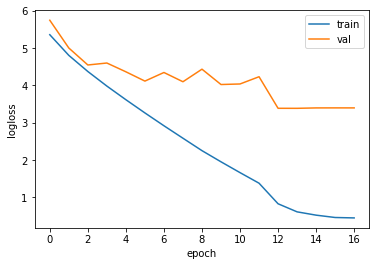

In [7]:
plt.plot(model.history.history['loss'], label='train');
plt.plot(model.history.history['val_loss'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('logloss');

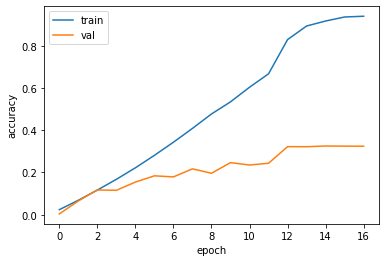

In [8]:
plt.plot(model.history.history['accuracy'], label='train');
plt.plot(model.history.history['val_accuracy'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('accuracy');

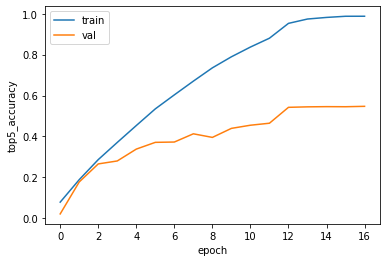

In [9]:
plt.plot(model.history.history['top_k_categorical_accuracy'], label='train');
plt.plot(model.history.history['val_top_k_categorical_accuracy'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('top5_accuracy');

In [10]:
model.evaluate_generator(val_generator, 80)

[3.3966503143310547, 0.32441407442092896, 0.547070324420929]